<a href="https://colab.research.google.com/github/Salerno85/Supervisionado/blob/main/Projeto_super_salerno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color=blue>**Daniel Garcia Coelho Salerno**

Caro aluno(a) Daniel,

Nessa disciplina, aprendemos nossos conhecimentos em algoritmos supervisionados, família de algoritmos que é extremamente importante para o dia-a-dia de um cientista de dados. Agora iremos validar nosso conhecimento. 

#<font color=blue> 1 Faça o módulo do Kaggle Intro to Machine Learning:
Comprove a finalização do módulo com um print que contenha data e identificação do aluno. #<font color=red>certificado inserido no arquivo geral.

#<font color=blue> 2 -Faça o download da base - esta é uma base real, apresentada no artigo:
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009. #<font color=red>resposta : realizado o load.

Ela possui uma variável denominada "quality", uma nota de 0 a 10 que denota a qualidade do vinho. Crie uma nova variável, chamada "opinion" que será uma variável categórica igual à 0, quando quality for menor e igual à 5. O valor será 1, caso contrário. Desconsidere a variável quality para o restante da análise.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score,
                             precision_score,
                             recall_score,
                             f1_score,
                             classification_report,
                             confusion_matrix,
                             mean_absolute_error,
                             roc_curve,
                             roc_auc_score,
                             auc,
                             RocCurveDisplay
)

In [2]:
sauvignon_blanc = pd.read_csv('/content/winequalityN.csv')

In [3]:
sauvignon_blanc

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


#<font color=blue> 3 - Descreva as variáveis presentes na base. Quais são as variáveis? Quais são os tipos de variáveis (discreta, categórica, contínua)? Quais são as médias e desvios padrões?
As variáveis presente são as seguintes:'fixed acidity', 'volatile acidity', 'citric acid','residual sugar', 'chlorides', 'free sulfur dioxide','total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol','quality'.
#<font color=red> type: Variável categórica que indica o tipo do vinho (branco, neste caso).
#<font color=red>fixed acidity: Variável contínua que representa a acidez fixa do vinho.
#<font color=red>volatile acidity: Variável contínua que representa a acidez volátil do vinho.
#<font color=red>citric acid: Variável contínua que representa o teor de ácido cítrico do vinho.
#<font color=red>residual sugar: Variável contínua que representa o teor de açúcar residual do vinho.
#<font color=red>chlorides: Variável contínua que representa o teor de cloretos do vinho.
#<font color=red>free sulfur dioxide: Variável contínua que representa a quantidade de dióxido de enxofre livre no vinho.
#<font color=red>total sulfur dioxide: Variável contínua que representa a quantidade total de dióxido de enxofre no vinho.
#<font color=red>density: Variável contínua que representa a densidade do vinho.
#<font color=red>pH: Variável contínua que representa o pH do vinho.
#<font color=red>sulphates: Variável contínua que representa o teor de sulfatos do vinho.
#<font color=red>alcohol: Variável contínua que representa o teor alcoólico do vinho.
#<font color=red>quality: Variável discreta que representa a qualidade do vinho em uma escala de 0 a 10.

#<font color=blue>4 - Com a base escolhida:

4(a) - Descreva as etapas necessárias para criar um modelo de classificação eficiente.



*   Definir o objetivo
*   Coletar dados
*   Explorar e preparar os dados
*   Dividir os dados
*   Selecionar o algoritmo de classificação
*   Treinar o modelo
*   Avaliar o modelo
*   Ajustar e otimizar o modelo



*Definir o objetivo: Determine claramente qual é o objetivo da classificação e o que você deseja prever ou identificar por meio do modelo.*

*Coletar dados: Reúna os dados relevantes para o problema de classificação. Isso pode envolver coleta de dados por meio de pesquisas, acesso a bancos de dados existentes ou uso de conjuntos de dados disponíveis publicamente.*

*Explorar e preparar os dados: Realize uma análise exploratória dos dados para entender suas características, distribuições e possíveis problemas, como valores ausentes ou outliers. Faça a limpeza dos dados, tratando valores ausentes, removendo outliers e transformando as variáveis, se necessário.*

Dividir os dados: Separe o conjunto de dados em conjuntos de treinamento e teste. O conjunto de treinamento será usado para treinar o modelo e o conjunto de teste será usado para avaliar seu desempenho final.

Selecionar o algoritmo de classificação: Escolha um algoritmo de classificação adequado ao problema e aos dados disponíveis. Existem várias opções, como regressão logística, árvores de decisão, SVM (Support Vector Machines), Naive Bayes, KNN (K-Nearest Neighbors), entre outros. *texto em itálico* *texto em itálico*

Treinar o modelo: Utilize o conjunto de treinamento para treinar o modelo. Isso envolve alimentar os dados ao algoritmo de classificação escolhido e ajustar seus parâmetros para encontrar a melhor configuração.

Avaliar o modelo: Avalie o desempenho do modelo utilizando o conjunto de teste. Calcule métricas como acurácia, precisão, recall e F1-score para medir a qualidade das previsões do modelo. *texto em itálico*

Ajustar e otimizar o modelo: Faça ajustes no modelo, como modificação de hiperparâmetros ou seleção de features, para melhorar seu desempenho. Isso pode envolver a utilização de técnicas como validação cruzada, busca em grade (grid search) ou algoritmos de otimização.

Validação final: Realize uma validação final do modelo utilizando dados completamente novos ou dados em tempo real. Isso ajudará a verificar se o modelo é realmente eficiente e pode ser usado em produção.

Implantar o modelo: Quando estiver satisfeito com o desempenho do modelo, implante-o em um ambiente de produção. Isso pode envolver a integração do modelo em um aplicativo, sistema ou fluxo de trabalho existente.







In [4]:
sauvignon_blanc.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [5]:
sauvignon_blanc.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [6]:
sauvignon_blanc_ravanal=sauvignon_blanc.interpolate()

In [7]:
sauvignon_blanc_ravanal.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
sauvignon_blanc_ravanal

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.665,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710,10.2,5


In [9]:
#retirando a coluna type
sauvignon_blanc_ravanal['type']

0       white
1       white
2       white
3       white
4       white
        ...  
6492      red
6493      red
6494      red
6495      red
6496      red
Name: type, Length: 6497, dtype: object

In [10]:
sauvignon_blanc_ravanal

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.665,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710,10.2,5


<ipython-input-11-4471d3b32dd7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(sauvignon_blanc_ravanal.corr(), vmax=1, vmin=-1, annot=True, ax=ax, cmap="RdYlGn")


<Axes: >

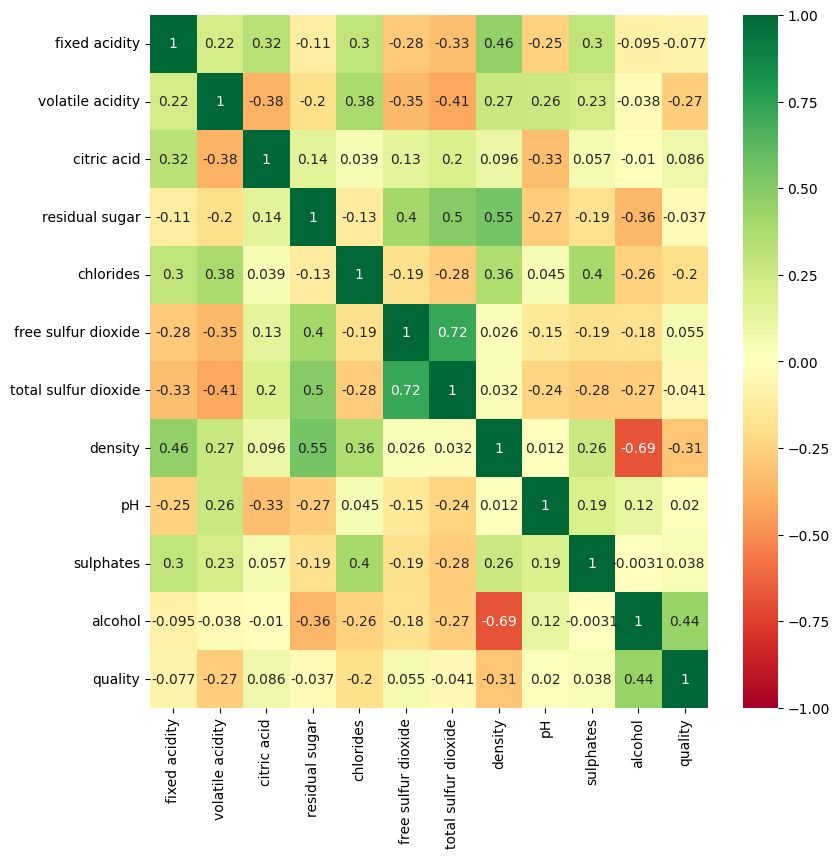

In [11]:
# mapa do verão carioca
fig, ax = plt.subplots(1, 1, figsize=(9, 9))
sns.heatmap(sauvignon_blanc_ravanal.corr(), vmax=1, vmin=-1, annot=True, ax=ax, cmap="RdYlGn")

In [12]:
sauvignon_blanc_ravanal.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [13]:
sauvignon_blanc_ravanal['opinion'] = sauvignon_blanc_ravanal['quality'].apply(lambda x: 0 if x <= 5 else 1)

In [14]:
sauvignon_blanc_ravanal.drop('quality', axis=1, inplace=True)

In [15]:
## Exibir as estatísticas descritivas das variáveis
description = sauvignon_blanc_ravanal.describe()
print(description)

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count     6497.00000       6497.000000  6497.000000     6497.000000   
mean         7.21573          0.339699     0.318650        5.444159   
std          1.29608          0.164616     0.145283        4.757821   
min          3.80000          0.080000     0.000000        0.600000   
25%          6.40000          0.230000     0.250000        1.800000   
50%          7.00000          0.290000     0.310000        3.000000   
75%          7.70000          0.400000     0.390000        8.100000   
max         15.90000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056037            30.525319            115.744574     0.994697   
std       0.035032            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

In [16]:
sauvignon_blanc_ravanal.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'opinion'],
      dtype='object')

In [17]:
var=['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'opinion']
var #acredito que renomear essas colunas como uma variavel, irá ajudar nos testes

['type',
 'fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'opinion']

<ipython-input-18-eed8a8f09cbc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(sauvignon_blanc_ravanal.corr(), vmax=1, vmin=-1, annot=True, ax=ax, cmap='PuBuGn')


<Axes: >

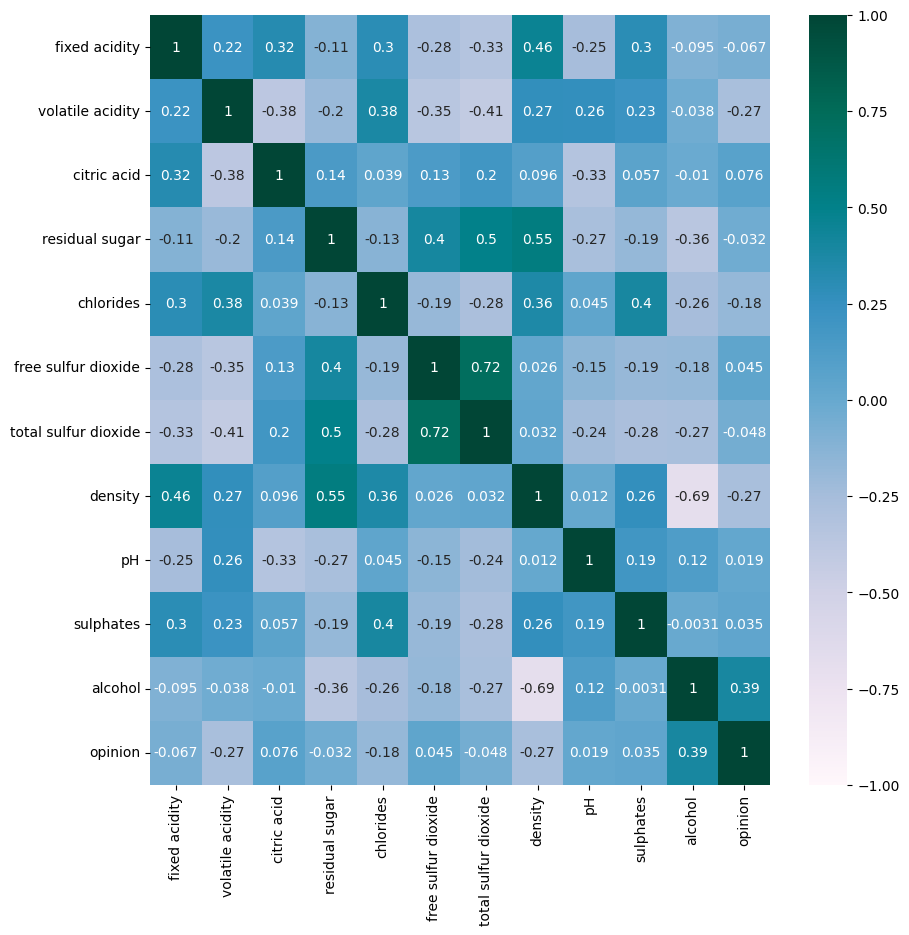

In [18]:
fig, ax=plt.subplots(1,1,figsize=(10,10))
sns.heatmap(sauvignon_blanc_ravanal.corr(), vmax=1, vmin=-1, annot=True, ax=ax, cmap='PuBuGn')

4 (B) - #<font color=blue>Treine um modelo de regressão logística usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:

i. a média e desvio da acurácia dos modelos obtidos;
ii. a média e desvio da precisão dos modelos obtidos;
iii. a média e desvio da recall dos modelos obtidos;
iv. a média e desvio do f1-score dos modelos obtidos.

In [ ]:
import statistics
accuracies = sauvignon_blanc_ravanal 
mean_accuracy = statistics.mean(accuracies)
std_deviation = statistics.stdev(accuracies)
print("Média da acurácia: ", mean_accuracy)
print("Desvio padrão da acurácia: ", std_deviation)

In [ ]:

scaler = StandardScaler()
X = scaler.fit_transform(X)


accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []


k_folds = 10
stratified_kfold = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)


In [ ]:
for train_index, test_index in stratified_kfold.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Treinando o modelo de regressão logística
    model = LogisticRegression(random_state=42)
    model.fit(X_train, y_train)

    # Realizando as predições
    y_pred = model.predict(X_test)

    # Calculando as métricas de desempenho
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Armazenando as métricas para cada fold
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Calculando as médias e desvios padrão das métricas
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
mean_precision = np.mean(precision_scores)
std_precision = np.std(precision_scores)
mean_recall = np.mean(recall_scores)
std_recall = np.std(recall_scores)
mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)

In [ ]:
# Imprimindo os resultados
print("Média e desvio padrão da acurácia:")
print("Média: {:.4f}, Desvio padrão: {:.4f}".format(mean_accuracy, std_accuracy))
print()
print("Média e desvio padrão da precisão:")
print("Média: {:.4f}, Desvio padrão: {:.4f}".format(mean_precision, std_precision))
print()
print("Média e desvio padrão da recall:")
print("Média: {:.4f}, Desvio padrão: {:.4f}".format(mean_recall, std_recall))
print()
print("Média e desvio padrão do F1-score:")
print("Média: {:.4f}, Desvio padrão: {:.4f}".format(mean_f1, std_f1))

Média e desvio padrão da acurácia:
Média: 0.7497, Desvio padrão: 0.0160

Média e desvio padrão da precisão:
Média: 0.7753, Desvio padrão: 0.0159

Média e desvio padrão da recall:
Média: 0.8791, Desvio padrão: 0.0185

Média e desvio padrão do F1-score:
Média: 0.8237, Desvio padrão: 0.0107

#<font color=blue> 4 (c)Treine um modelo de árvores de decisão usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:
i. a média e desvio da acurácia dos modelos obtidos;
ii. a média e desvio da precisão dos modelos obtidos;
iii. a média e desvio da recall dos modelos obtidos;
iv. a média e desvio do f1-score dos modelos obtidos.

In [ ]:
X1=sauvignon_blanc_ravanal[var]
y1=sauvignon_blanc_ravanal["opinion"]

# Padronizando os recursos
scaler = StandardScaler()
X1 = scaler.fit_transform(X1)

# Inicializando as listas para armazenar as métricas
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Definindo a validação cruzada estratificada com k-folds
k_folds = 10
stratified_kfold = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

In [ ]:
for train_index, test_index in stratified_kfold.split(X1, y1):
    X1_train, X1_test = X1[train_index], X1[test_index]
    y1_train, y1_test = y1[train_index], y1[test_index]

    # Treinando o modelo de arvore de decisão
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X1_train, y1_train)

    # Realizando as predições
    y1_pred = clf.predict(X1_test)

    # Calculando as métricas de desempenho
    accuracy = accuracy_score(y1_test, y1_pred)
    precision = precision_score(y1_test, y1_pred)
    recall = recall_score(y1_test, y1_pred)
    f1 = f1_score(y1_test, y1_pred)

    # Armazenando as métricas para cada fold
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

In [ ]:
# Calculando as médias e desvios padrão das métricas
mean_accuracy1 = np.mean(accuracy_scores)
std_accuracy1 = np.std(accuracy_scores)
mean_precision1 = np.mean(precision_scores)
std_precision1 = np.std(precision_scores)
mean_recall1 = np.mean(recall_scores)
std_recall1 = np.std(recall_scores)
mean_f11 = np.mean(f1_scores)
std_f11 = np.std(f1_scores)

In [ ]:
print("Média e desvio padrão da acurácia:")
print("Média: {:.4f}, Desvio padrão: {:.4f}".format(mean_accuracy1, std_accuracy1))
print()
print("Média e desvio padrão da precisão:")
print("Média: {:.4f}, Desvio padrão: {:.4f}".format(mean_precision1, std_precision1))
print()
print("Média e desvio padrão da recall:")
print("Média: {:.4f}, Desvio padrão: {:.4f}".format(mean_recall1, std_recall1))
print()
print("Média e desvio padrão do F1-score:")
print("Média: {:.4f}, Desvio padrão: {:.4f}".format(mean_f11, std_f11))

Média e desvio padrão da acurácia:
Média: 0.7926, Desvio padrão: 0.0195

Média e desvio padrão da precisão:
Média: 0.8470, Desvio padrão: 0.0128

Média e desvio padrão da recall:
Média: 0.8401, Desvio padrão: 0.0282

Média e desvio padrão do F1-score:
Média: 0.8433, Desvio padrão: 0.0166

#<font color=blue> 4 (d) Treine um modelo de SVM usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:
i. a média e desvio da acurácia dos modelos obtidos;
ii. a média e desvio da precisão dos modelos obtidos;
iii. a média e desvio da recall dos modelos obtidos;
iv. a média e desvio do f1-score dos modelos obtidos.

> Bloco com recuo



In [19]:
X2=sauvignon_blanc_ravanal[var]
y2=sauvignon_blanc_ravanal["opinion"]

# Padronizando os recursos
scaler = StandardScaler()
X2 = scaler.fit_transform(X2)

# Inicializando as listas para armazenar as métricas
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Definindo a validação cruzada estratificada com k-folds
k_folds = 10
stratified_kfold = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

ValueError: ignored

In [ ]:
for train_index, test_index in stratified_kfold.split(X2, y2):
    X2_train, X2_test = X2[train_index], X2[test_index]
    y2_train, y2_test = y2[train_index], y2[test_index]

    # Treinando o modelo de arvore de decisão
    svm = SVC(random_state=42)
    svm.fit(X2_train, y2_train)

    # Realizando as predições
    y2_pred = svm.predict(X2_test)

    # Calculando as métricas de desempenho
    accuracy = accuracy_score(y2_test, y2_pred)
    precision = precision_score(y2_test, y2_pred)
    recall = recall_score(y2_test, y2_pred)
    f1 = f1_score(y2_test, y2_pred)

    # Armazenando as métricas para cada fold
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Calculando as médias e desvios padrão das métricas
mean_accuracy2 = np.mean(accuracy_scores)
std_accuracy2 = np.std(accuracy_scores)
mean_precision2 = np.mean(precision_scores)
std_precision2 = np.std(precision_scores)
mean_recall2 = np.mean(recall_scores)
std_recall2 = np.std(recall_scores)
mean_f12 = np.mean(f1_scores)
std_f12 = np.std(f1_scores)

In [ ]:
print("Média e desvio padrão da acurácia:")
print("Média: {:.4f}, Desvio padrão: {:.4f}".format(mean_accuracy2, std_accuracy2))
print()
print("Média e desvio padrão da precisão:")
print("Média: {:.4f}, Desvio padrão: {:.4f}".format(mean_precision2, std_precision2))
print()
print("Média e desvio padrão da recall:")
print("Média: {:.4f}, Desvio padrão: {:.4f}".format(mean_recall2, std_recall2))
print()
print("Média e desvio padrão do F1-score:")
print("Média: {:.4f}, Desvio padrão: {:.4f}".format(mean_f12, std_f12))

Média e desvio padrão da acurácia:
Média: 0.7834, Desvio padrão: 0.0134

Média e desvio padrão da precisão:
Média: 0.8108, Desvio padrão: 0.0110

Média e desvio padrão da recall:
Média: 0.8797, Desvio padrão: 0.0133

Média e desvio padrão do F1-score:
Média: 0.8438, Desvio padrão: 0.0097

 #<font color=blue> 5- Em relação à questão anterior, qual o modelo deveria ser escolhido para uma eventual operação. Responda essa questão mostrando a comparação de todos os modelos, usando um gráfico mostrando a curva ROC média para cada um dos gráficos e justifique.

In [21]:

k_folds = 10

mean_fpr = np.linspace(0, 1, 100)
tprs = []

aucs = []

cv = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

In [ ]:
for train_index, test_index in cv.split(X, y):
    # Dividir o conjunto de dados em treino e teste para cada fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Treinar o modelo de regressão logística
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Calcular as probabilidades preditas do conjunto de teste
    y_scores = model.predict_proba(X_test)[:, 1]

    # Calcular a curva ROC para o fold atual
    fpr, tpr, _ = roc_curve(y_test, y_scores)

    # Interpolar e salvar a TPR do fold atual
    tprs.append(np.interp(mean_fpr, fpr, tpr))

    # Calcular a AUC do fold atual
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)

# Calcular a média e desvio padrão da AUC
mean_auc = np.mean(aucs)
std_auc = np.std(aucs)

NAO CONSEGUI CONCLUIR A QUESTAO A TEMPO

 #<font color=blue> 6- Com a escolha do melhor modelo, use os dados de vinho tinto, presentes na base original e faça a inferência (não é para treinar novamente!!!) para saber quantos vinhos são bons ou ruins. Utilize o mesmo critério utilizado com os vinhos brancos, para comparar o desempenho do modelo. Ele funciona da mesma forma para essa nova base? Justifique.

In [30]:
sauvignon_blanc

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [31]:
#alterando para vinho tinto, detalhe melhor vinho português.
Angelica_zapata=sauvignon_blanc[sauvignon_blanc["type"]=="red"]

In [32]:
Angelica_zapata

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4898,red,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
4899,red,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
4900,red,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
4901,red,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4902,red,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [33]:
Angelica_zapata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 4898 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  1599 non-null   object 
 1   fixed acidity         1597 non-null   float64
 2   volatile acidity      1598 non-null   float64
 3   citric acid           1598 non-null   float64
 4   residual sugar        1599 non-null   float64
 5   chlorides             1599 non-null   float64
 6   free sulfur dioxide   1599 non-null   float64
 7   total sulfur dioxide  1599 non-null   float64
 8   density               1599 non-null   float64
 9   pH                    1597 non-null   float64
 10  sulphates             1597 non-null   float64
 11  alcohol               1599 non-null   float64
 12  quality               1599 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 174.9+ KB


In [34]:
Angelica_zapata.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1597.000000,1598.000000,1598.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1597.000000,1597.000000,1599.000000,1599.000000
mean,8.322104,0.527738,0.271145,2.538806,0.087467,15.874922,46.467792,0.996747,3.310864,0.658078,10.422983,5.636023
std,1.740767,0.179085,0.194744,1.409928,0.047065,10.460157,32.895324,0.001887,0.154290,0.169594,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [35]:
Angelica_zapata.isnull().sum()

type                    0
fixed acidity           2
volatile acidity        1
citric acid             1
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      2
sulphates               2
alcohol                 0
quality                 0
dtype: int64

In [36]:
Angelica_zapata=Angelica_zapata.interpolate()

In [37]:
Angelica_zapata.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: >

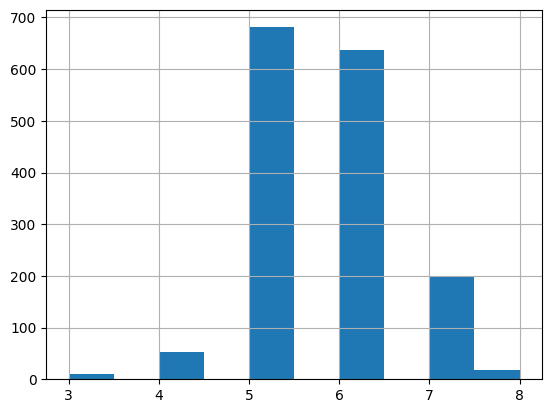

In [38]:
Angelica_zapata.quality.hist()

In [39]:
del Angelica_zapata["type"]

In [40]:
Angelica_zapata

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4898,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.560,9.4,5
4899,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.680,9.8,5
4900,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.650,9.8,5
4901,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.580,9.8,6
4902,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.560,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580,10.5,5
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.665,11.2,6
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750,11.0,6
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710,10.2,5


In [41]:
Angelica_zapata["opinion"]=(Angelica_zapata.quality > 5).astype(float)

In [43]:
Angelica_zapata.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'opinion'],
      dtype='object')

<Axes: >

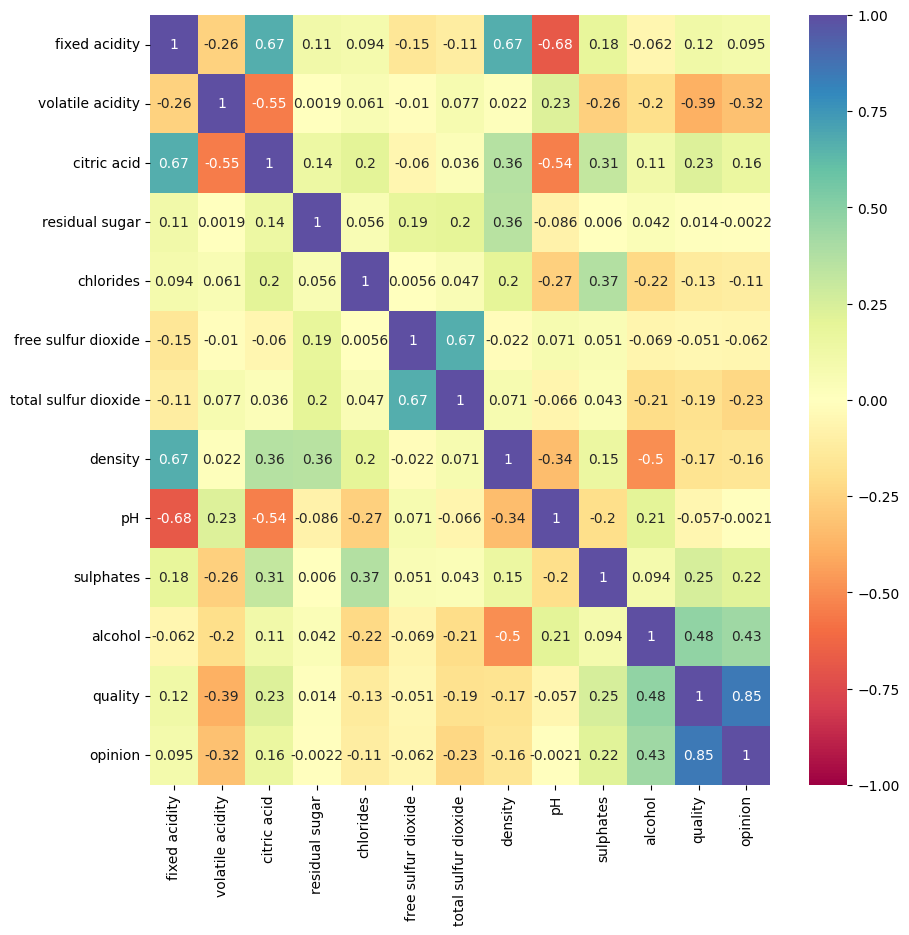

In [44]:
fig, ax=plt.subplots(1,1,figsize=(10,10))
sns.heatmap(Angelica_zapata.corr(), vmax=1, vmin=-1, annot=True, ax=ax, cmap="Spectral")

<Axes: >

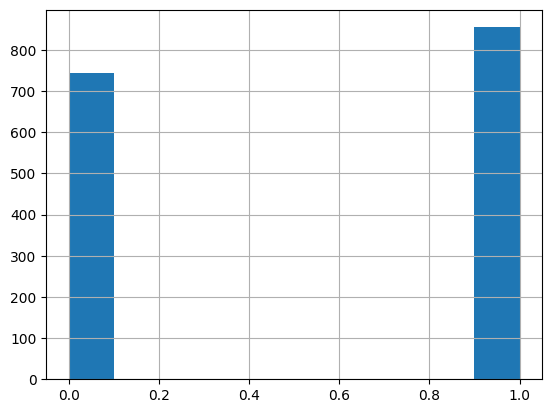

In [45]:
Angelica_zapata.opinion.hist()